<a href="https://colab.research.google.com/github/lenaphamthi/PTDL-HK1_2023-2024/blob/main/%5B3%5D%20%C4%90%E1%BB%93%20%C3%A1n%20PTDL-NLP_Cleandata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from wordcloud import WordCloud

# Preprocessing and evaluation
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1, l2

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('all')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_gr

True

In [ ]:
import pandas as pd
import nltk
import string
from nltk.tokenize import TweetTokenizer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
from sklearn import svm
from sklearn.metrics import classification_report
import csv
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#https://drive.google.com/file/d/1baAbDP_BK_jS0Gz1bNpR5mmfASIpV2sd/view?usp=sharing
!gdown 1ebHdDCmsysyKZTvH8rkId29GHiHwrCvy
#!gdown 1baAbDP_BK_jS0Gz1bNpR5mmfASIpV2sd

Mounted at /content/drive
Downloading...
From: https://drive.google.com/uc?id=1ebHdDCmsysyKZTvH8rkId29GHiHwrCvy
To: /content/Review_processed.csv
100% 12.8M/12.8M [00:00<00:00, 99.9MB/s]


In [ ]:
!gdown 1uDUiSC2LvWJpPuXzWKP6M8z3vvthtsKO

# Mục mới

In [ ]:
tweetFile = pd.read_csv("Review_processed.csv")
len(tweetFile)

22000

In [ ]:
def cleaning(text):
    #remove punctuations and uppercase
    clean_text = text.translate(str.maketrans('','',string.punctuation)).lower()

    #remove stopwords
    clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]

    #lemmatize the word (normalization)
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

In [ ]:
df = tweetFile[["Reviewer's content", "Reviewer's rate","label"]]
df.head()

,Reviewer's content,Reviewer's rate,label
0,Hindu Temple complex built by the Cham. Very r...,5,Positive
1,Po Nagar Cham Tower is a Cham temple tower fou...,5,Positive
2,It’s a historical place where my children were...,5,Positive
3,"The temple is very well-preserved, especially ...",5,Positive
4,Only needs half an hour. Lovely grounds. Less ...,5,Positive


In [ ]:
# Length of word in sentence
df['Length'] = df["Reviewer's content"].apply(len)
df.head()

<ipython-input-9-871dadd59842>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length'] = df["Reviewer's content"].apply(len)


,Reviewer's content,Reviewer's rate,label,Length
0,Hindu Temple complex built by the Cham. Very r...,5,Positive,201
1,Po Nagar Cham Tower is a Cham temple tower fou...,5,Positive,654
2,It’s a historical place where my children were...,5,Positive,178
3,"The temple is very well-preserved, especially ...",5,Positive,306
4,Only needs half an hour. Lovely grounds. Less ...,5,Positive,141


In [ ]:
# Total word in dataset before cleaning
length = df['Length'].sum()

In [ ]:
df['clean'] = df["Reviewer's content"].apply(cleaning)

<ipython-input-11-d66043c0a75c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean'] = df["Reviewer's content"].apply(cleaning)


In [ ]:
df.head()

,Reviewer's content,Reviewer's rate,label,Length,clean
0,Hindu Temple complex built by the Cham. Very r...,5,Positive,201,hindu temple complex build cham reminiscent ea...
1,Po Nagar Cham Tower is a Cham temple tower fou...,5,Positive,654,po nagar cham tower cham temple tower found so...
2,It’s a historical place where my children were...,5,Positive,178,it’s historical place children love visit arch...
3,"The temple is very well-preserved, especially ...",5,Positive,306,temple wellpreserved especially consider close...
4,Only needs half an hour. Lovely grounds. Less ...,5,Positive,141,need half hour lovely ground less one usd ente...


In [ ]:
df['Length'] = df['clean'].apply(len)
new_length = df['Length'].sum()

print('Total text length before cleaning: {}'.format(length))
print('Total text length after cleaning: {}'.format(new_length))

Total text length before cleaning: 10485660
Total text length after cleaning: 6262337


<ipython-input-13-17741237d0f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length'] = df['clean'].apply(len)


In [ ]:
df.to_csv('cleaned_df.csv', index=False)

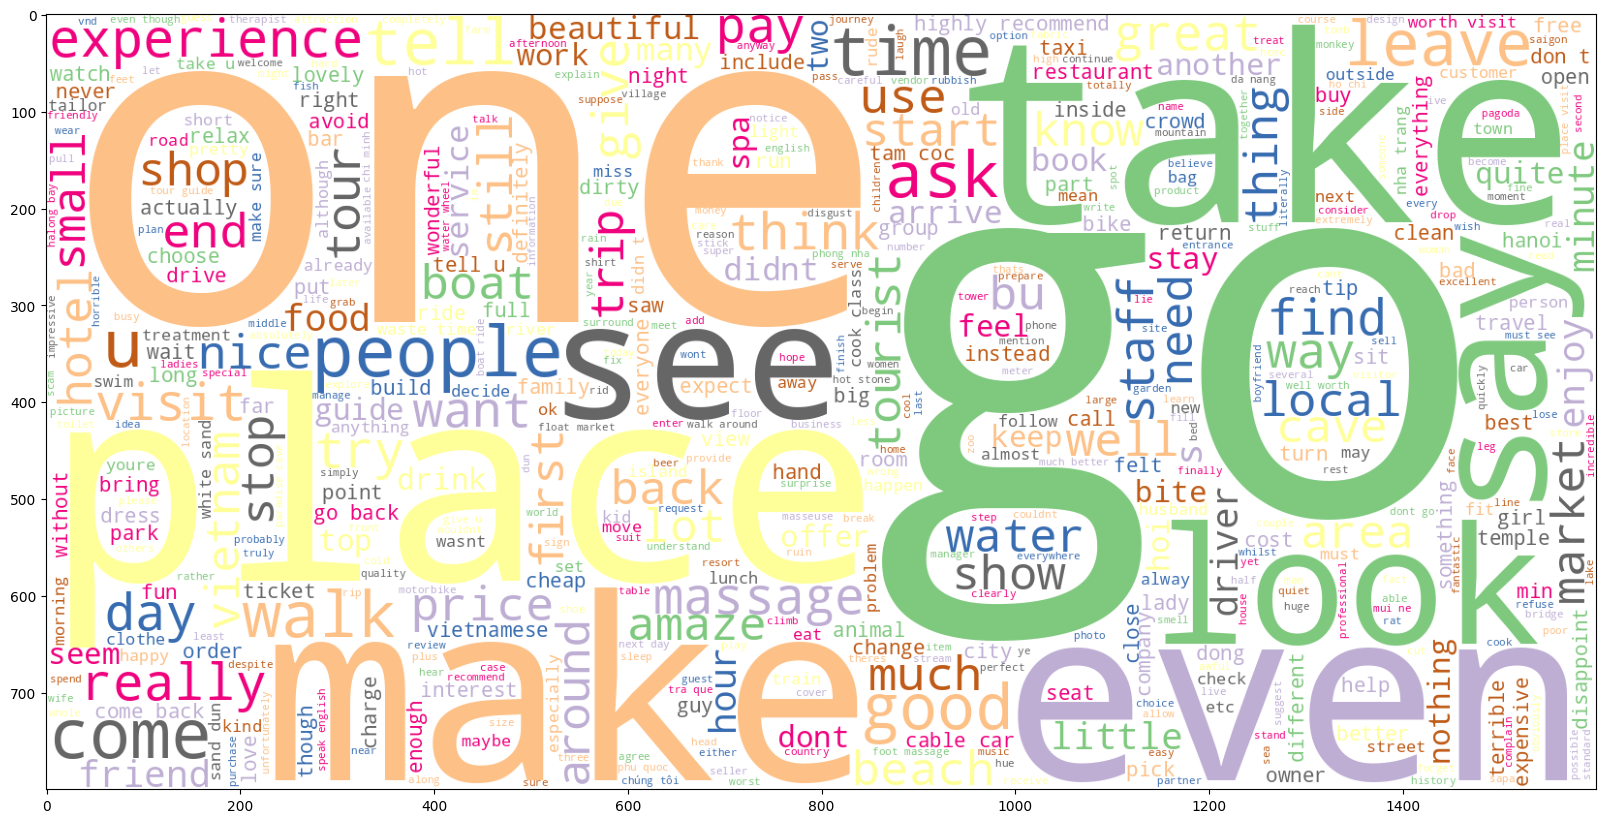

In [ ]:
# After cleaning, let's see the most common used word
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white", colormap='Accent').generate(' '.join(df['clean']))

plt.imshow(wc)

In [ ]:
df1 = df.loc[df['label'] == "Positive"]
df2 = df.loc[df['label'] == "negative"]

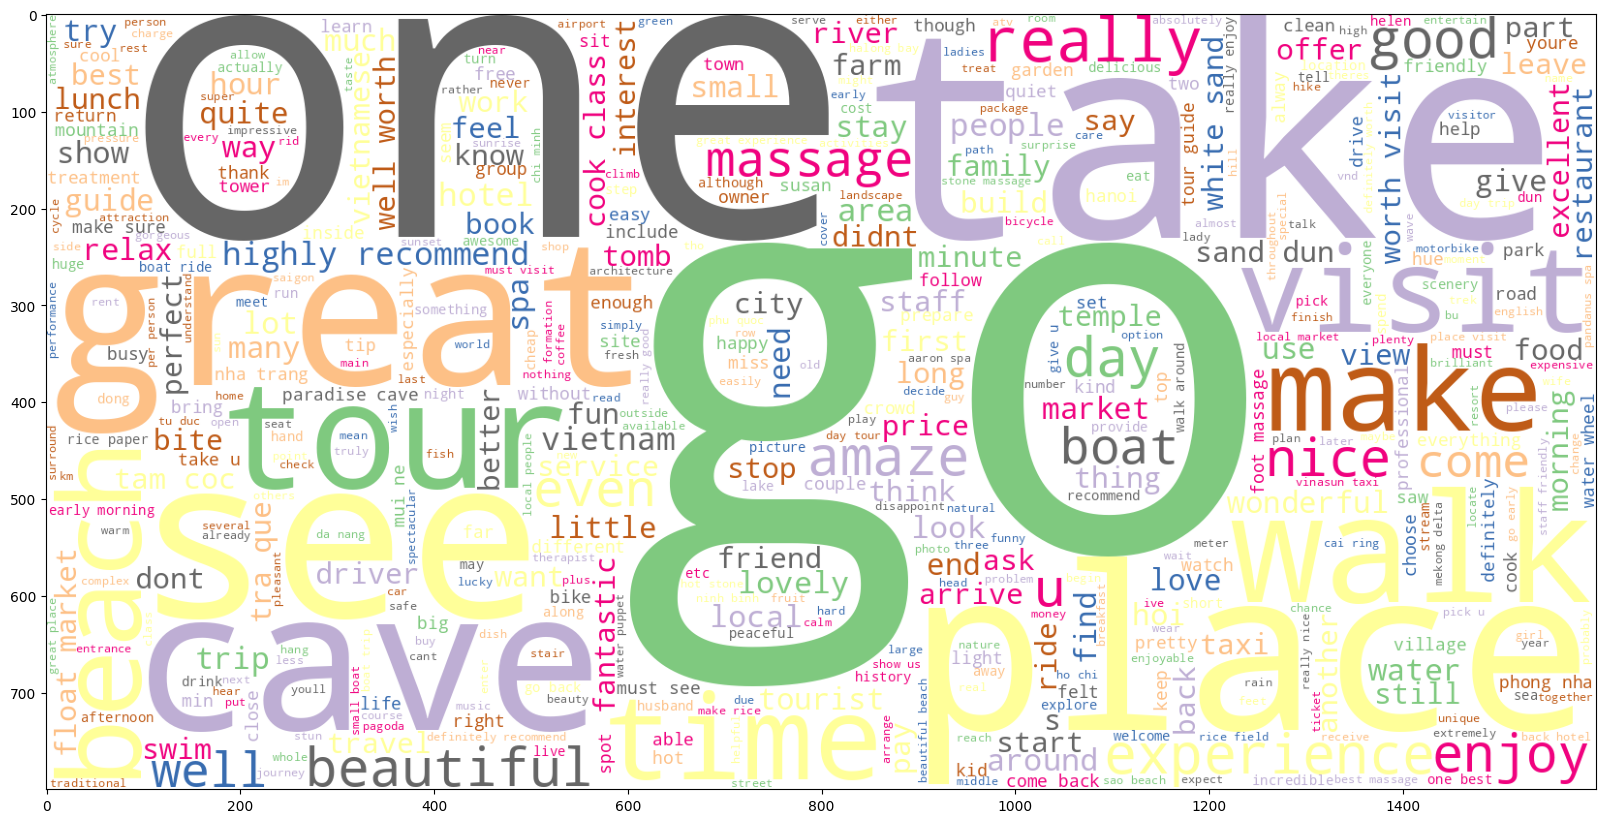

In [ ]:
# After cleaning, let's see the most common used word
plt.figure(figsize=(20,20))
wc1 = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white", colormap='Accent').generate(' '.join(df1['clean']))

plt.imshow(wc1)

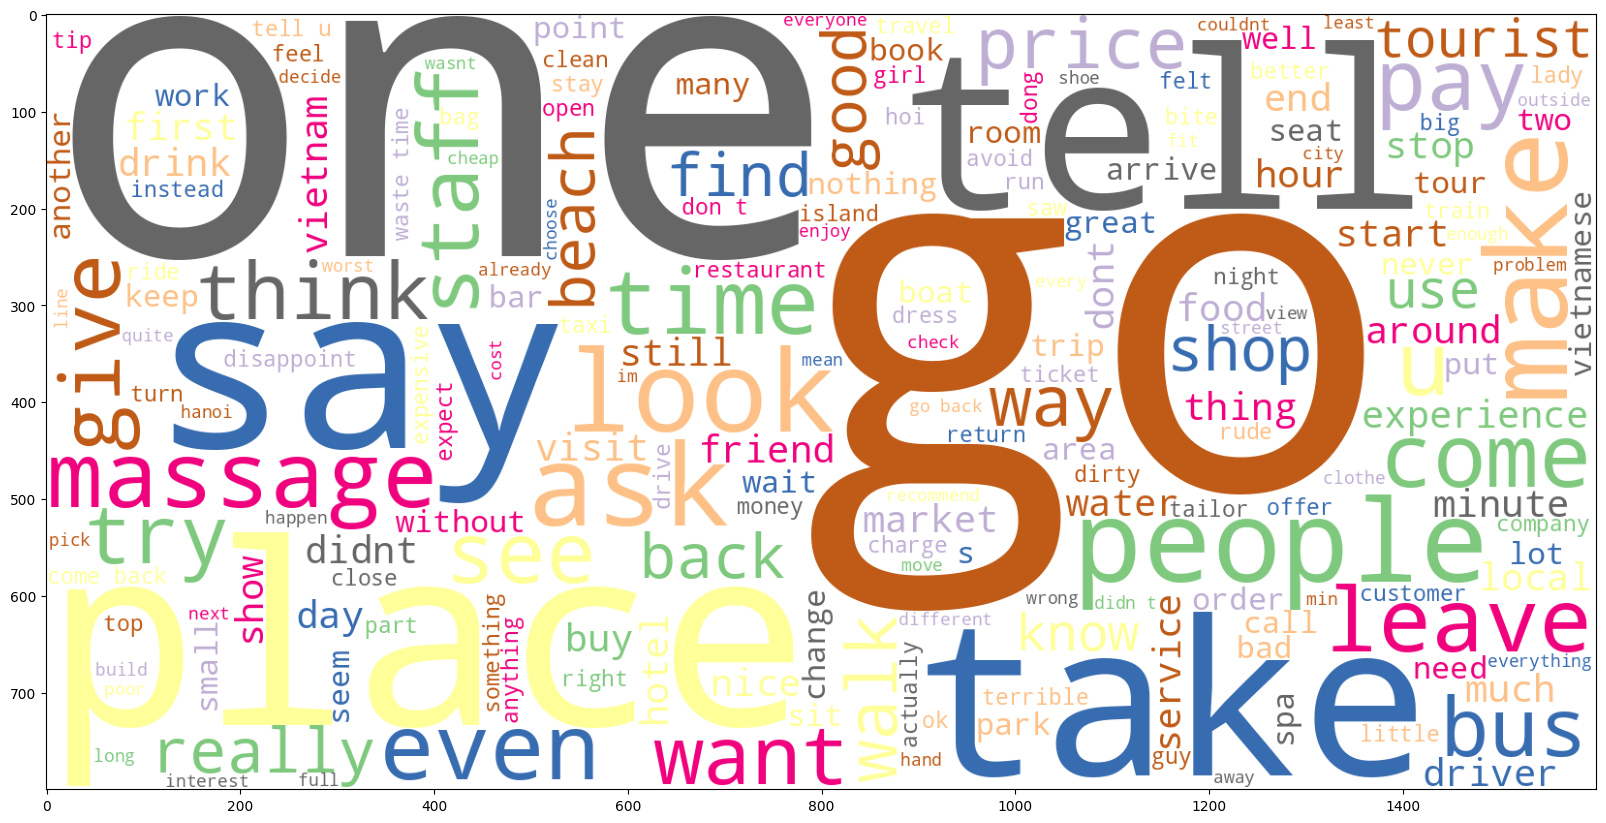

In [ ]:
# After cleaning, let's see the most common used word
plt.figure(figsize=(20,20))
wc2 = WordCloud(max_words=200, min_font_size=10,
                height=800,width=1600,background_color="white", colormap='Accent').generate(' '.join(df2['clean']))

plt.imshow(wc2)